# Project Investigate a Dataset


##    >>TMDB Movies Dataset

In [ ]:
# Dataset - TMDB_movies
# Questions
# - Which genres are most popular from year to year
# - What kind of properties are associated with movies that have high rating
# -


## Data Wrangling

In [4]:
import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as sns
%matplotlib inline
mdf = pd.read_csv("01 Datasets\\tmdb-movies.csv")

In [5]:
mdf.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [6]:
mdf.shape

(10866, 21)

## Data Cleaning

In [7]:
# Dropping unrequired columns from the dataframe 
mdf.drop(['id','imdb_id','tagline','keywords','overview','homepage'], axis=1, inplace=True)
mdf.shape

(10866, 15)

In [8]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(5), object(6)
memory usage: 1.2+ MB


In [9]:
mdf.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [10]:
#correlation matrix
mcorr = mdf.corr()
mcorr

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,1.000000,0.545472,0.663358,0.139033,0.800828,0.209511,0.089801,0.513550,0.609083
budget,0.545472,1.000000,0.734901,0.191283,0.632702,0.081014,0.115931,0.968963,0.622505
revenue,0.663358,0.734901,1.000000,0.162838,0.791175,0.172564,0.057048,0.706427,0.919110
runtime,0.139033,0.191283,0.162838,1.000000,0.163278,0.156835,-0.117204,0.221114,0.175676
vote_count,0.800828,0.632702,0.791175,0.163278,1.000000,0.253823,0.107948,0.587051,0.707942
vote_average,0.209511,0.081014,0.172564,0.156835,0.253823,1.000000,-0.117632,0.093039,0.193085
release_year,0.089801,0.115931,0.057048,-0.117204,0.107948,-0.117632,1.000000,0.016793,-0.066256
budget_adj,0.513550,0.968963,0.706427,0.221114,0.587051,0.093039,0.016793,1.000000,0.646607
revenue_adj,0.609083,0.622505,0.919110,0.175676,0.707942,0.193085,-0.066256,0.646607,1.000000


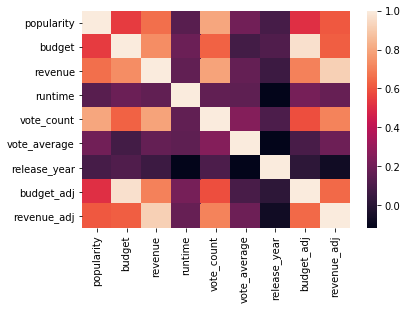

In [11]:
#Correlation Matrix to observe the correlation between the variables
import seaborn as sns
sns.heatmap(mcorr);

# Insights from Data

### 1) Top 10 revenue generating director

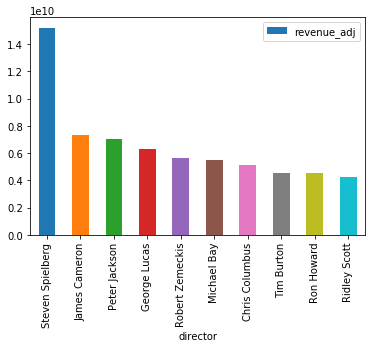

In [12]:
director_revenue = mdf.groupby('director',as_index=False).agg({'revenue_adj':'sum'}).sort_values(by='revenue_adj',ascending=False)
top_10_director_revenue = director_revenue.nlargest(10,'revenue_adj').sort_values(by='revenue_adj',ascending=False)
top_10_director_revenue.plot(x='director',y='revenue_adj',kind='bar');


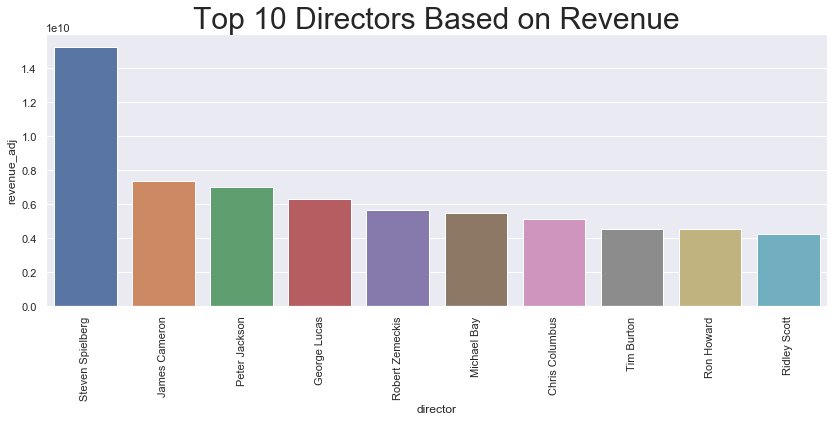

In [111]:
#bar plot using seaborn
sns.set(style="darkgrid")
a4_dims=(14,5)
fig, ax = pyplot.subplots(figsize=a4_dims)
g = sns.barplot(x="director",y="revenue_adj",data=top_10_director_revenue);
g.set_xticklabels(ax.get_xticklabels(),rotation=90);
g.set_title('Top 10 Directors Based on Revenue',fontsize=30);

### 2) Directors with Highest Profits

In [16]:
directors_profit = mdf.groupby('director',as_index=False).agg({'revenue_adj':'sum','budget_adj':'sum'})
directors_profit['profit'] = directors_profit['revenue_adj']-directors_profit['budget_adj']
top_10_directors_profit = directors_profit.nlargest(10,'profit').sort_values(by='profit',ascending=False)
top_10_directors_profit

,director,revenue_adj,budget_adj,profit
4601,Steven Spielberg,1.520245e+10,2.151770e+09,1.305068e+10
1997,James Cameron,7.327221e+09,1.030992e+09,6.296229e+09
1679,George Lucas,6.313919e+09,4.697600e+08,5.844159e+09
3800,Peter Jackson,7.019848e+09,1.375725e+09,5.644123e+09
763,Chris Columbus,5.094077e+09,7.407345e+08,4.353343e+09
4140,Robert Zemeckis,5.655648e+09,1.328678e+09,4.326970e+09
3284,Michael Bay,5.460672e+09,1.501996e+09,3.958676e+09
1203,David Yates,4.177455e+09,7.830252e+08,3.394430e+09
4716,Tim Burton,4.529285e+09,1.328826e+09,3.200460e+09
845,Christopher Nolan,4.164262e+09,1.014694e+09,3.149568e+09


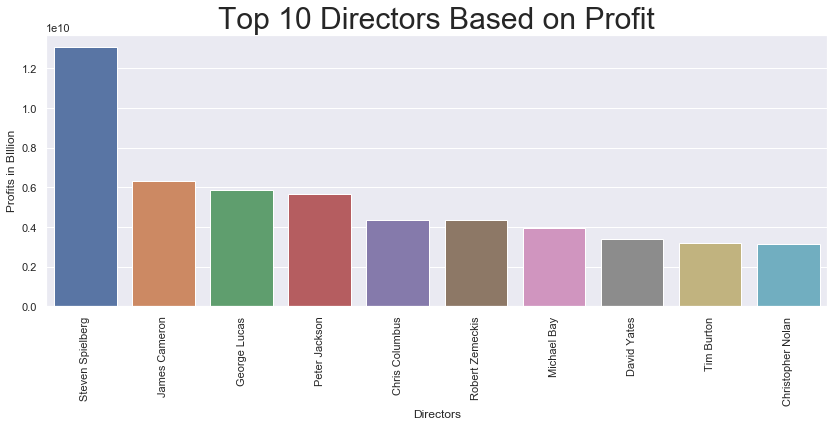

In [159]:
#bar plot using seaborn

sns.set(style="darkgrid")
a4_dims=(14,5)
fig, ax = pyplot.subplots(figsize=a4_dims)
gr = sns.barplot(x="director",y="profit",data=top_10_directors_profit)
gr.set_xticklabels(ax.get_xticklabels(),rotation=90);
gr.set_title("Top 10 Directors Based on Profit",fontsize=30);
ax.set(ylabel='Profits in BIllion', xlabel='Directors');

In [137]:
#filter_list = ['Steven Spielberg', 'James Cameron', 'George Lucas','Peter Jackson','Chris Columbus','Robert Zemeckis','Michael Bay','David Yates','Tim Burton','Christopher Nolan']
filter_list = ['Steven Spielberg', 'James Cameron', 'George Lucas','Peter Jackson','Chris Columbus',
               'Michael Bay','Christopher Nolan']
top_10_dir=mdf[mdf.director.isin(filter_list)]

In [138]:

director_yearly_profit = mdf[mdf.director.isin(filter_list)].groupby(['director','release_year'],as_index=False).agg({'revenue_adj':'sum','budget_adj':'sum'})
director_yearly_profit['profit']=director_yearly_profit['revenue_adj']-director_yearly_profit['budget_adj']
director_yearly_profit.sort_values(by=['director','release_year'],ascending=[False,False],inplace=True)
director_yearly_profit.head(1)


,director,release_year,revenue_adj,budget_adj,profit
86,Steven Spielberg,2015,1.496016e+08,3.679998e+07,1.128016e+08


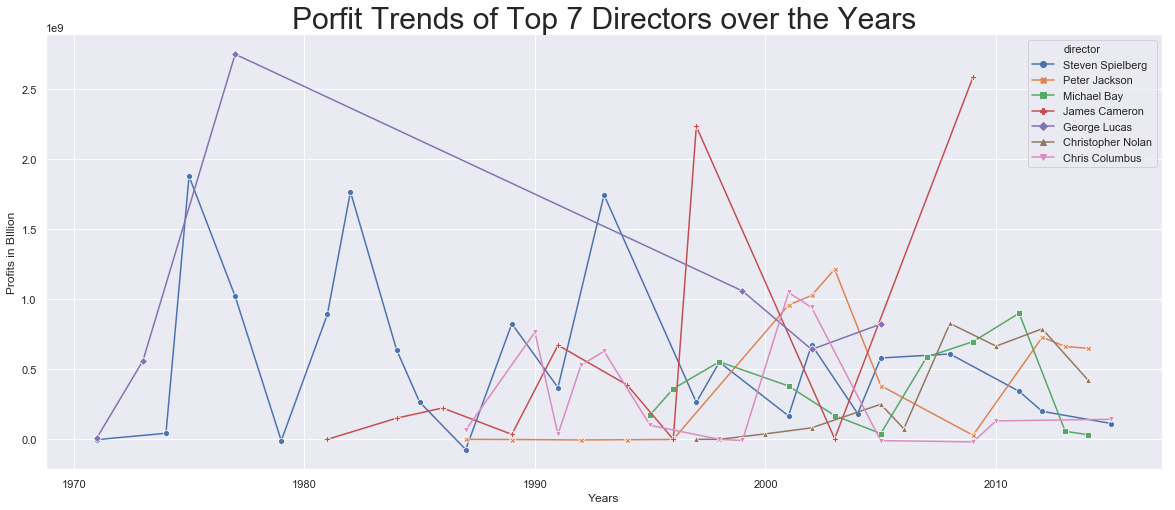

In [180]:
#line chart to show the trend of profits of the top 10 directors over the year
sns.set(style="darkgrid")
a4_dims=(20,8)
fig, ax = pyplot.subplots(figsize=a4_dims)
top_dir_gr = sns.lineplot(x="release_year",y="profit",hue="director",style="director",markers=True,dashes=False,data=director_yearly_profit)
top_dir_gr.set_title("Porfit Trends of Top 7 Directors over the Years",fontsize=30);
ax.set(ylabel='Profits in BIllion', xlabel='Years');

### 3) What are the most popular genres

In [ ]:
genre_list = mdf.groupby("genres")

### 4) Most Profitable Movies

In [189]:
movie_list = mdf.groupby(['original_title','director'],as_index=False).agg({'revenue_adj':'sum','budget_adj':'sum','vote_average':'mean','popularity':'mean'})
movie_list['profit'] = movie_list["revenue_adj"]-movie_list["budget_adj"]
top_movie_profit = movie_list.nlargest(5,'profit')
top_movie_profit

,original_title,director,revenue_adj,budget_adj,vote_average,popularity,profit
7530,Star Wars,George Lucas,2.789712e+09,3.957559e+07,7.9,12.037933,2.750137e+09
834,Avatar,James Cameron,2.827124e+09,2.408869e+08,7.1,9.432768,2.586237e+09
9953,Titanic,James Cameron,2.506406e+09,2.716921e+08,7.3,4.355219,2.234714e+09
8463,The Exorcist,William Friedkin,2.167325e+09,3.928928e+07,7.2,2.010733,2.128036e+09
4397,Jaws,Steven Spielberg,1.907006e+09,2.836275e+07,7.3,2.563191,1.878643e+09


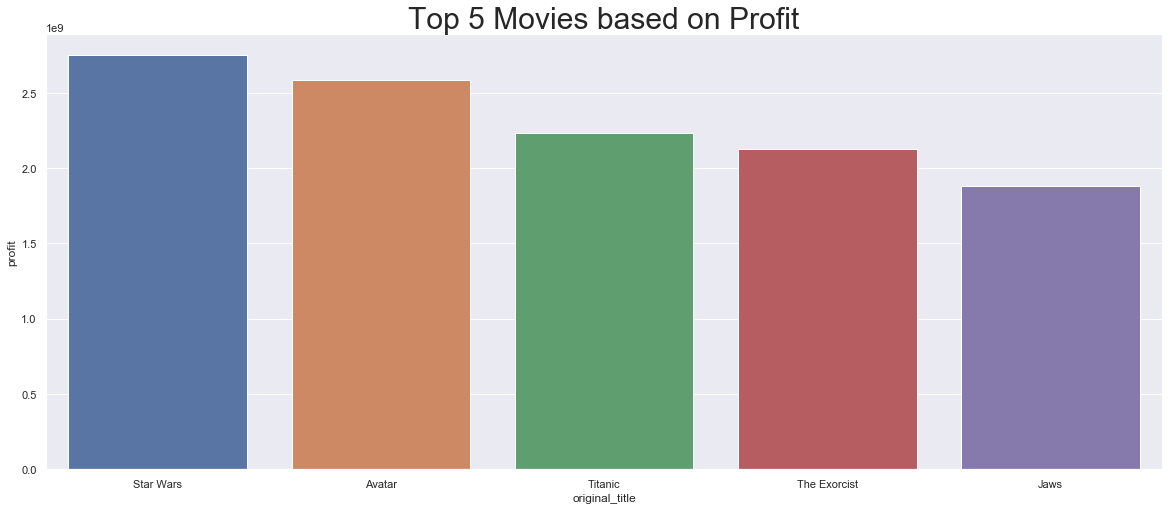

In [185]:
#line chart to show the trend of profits of the top 10 directors over the year
sns.set(style="darkgrid")
a4_dims=(20,8)
fig, ax = pyplot.subplots(figsize=a4_dims)
top_movie_gr = sns.barplot(x="original_title",y="profit",data=top_movie_profit)
top_movie_gr.set_title("Top 5 Movies based on Profit",fontsize=30);

In [188]:
movie_list[movie_list['original_title']=='Avatar']

,original_title,director,revenue_adj,budget_adj,vote_average,profit
834,Avatar,James Cameron,2.827124e+09,2.408869e+08,7.1,2.586237e+09


### 5) Most Popular Movies

In [190]:
top_movie_vote = movie_list.nlargest(5,'popularity')
top_movie_vote

,original_title,director,revenue_adj,budget_adj,vote_average,popularity,profit
4535,Jurassic World,Colin Trevorrow,1.392446e+09,1.379999e+08,6.5,32.985763,1.254446e+09
5186,Mad Max: Fury Road,George Miller,3.481613e+08,1.379999e+08,7.1,28.419936,2.101614e+08
4260,Interstellar,Christopher Nolan,5.726906e+08,1.519800e+08,8.0,24.949134,4.207106e+08
3567,Guardians of the Galaxy,James Gunn,7.122911e+08,1.565855e+08,7.9,14.311205,5.557057e+08
4252,Insurgent,Robert Schwentke,2.716190e+08,1.012000e+08,6.3,13.112507,1.704191e+08


## Q5 Which are the most popular movies

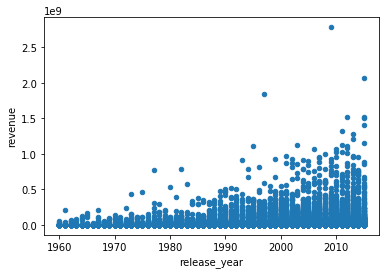

In [33]:
#growth in revenue over time
#mdf.plot(x='release_year',y='budget',kind='scatter')

mdf.plot(x='release_year',y='revenue',kind='scatter')

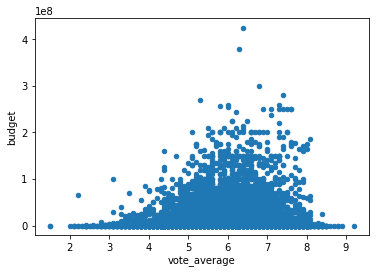

In [4]:
#correlation between budget and vote count
mdf.plot(x="vote_average",y="budget",kind="scatter");

In [2]:
#correlation between popularity and vote count
mdf.plot(x="vote_average",y="popularity",kind="scatter");

NameError: name 'mdf' is not defined

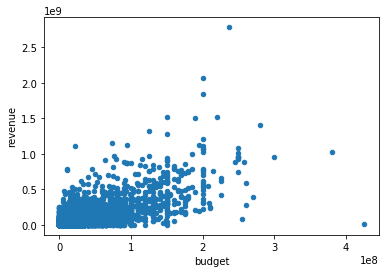

In [20]:
#correlation between budget and revenue
mdf.plot(x="budget",y="revenue",kind="scatter");